In [9]:
print('Nauja tema. AdventureWorks2022')
# https://www.dbdiagrams.com/sql-server/sql-server-adventureworks-diagram/

# Šis failas:
# /home/administratorius/git/python_kursai/ DataScienceNotebooks/Studentai/MykolasOK/*.ipynb
# Duomenų šaltiniai:
# /home/administratorius/git/python_kursai/ DataScienceNotebooks/DATA/*
# /home/administratorius/git/python_kursai/ gautiDuomenys/AdventureWorks2022/
# /home/administratorius/git/python_kursai/ gAdwentureWorks2022.db

Nauja tema. AdventureWorks2022


In [10]:
import sqlite3
import pandas as pd
import sys
import os

db_path = '../../../gautiDuomenys/AdventureWorks2022/AdventureWorks2022.db'

if os.path.exists(db_path):
    print(f"Duomenys imami iš failo '{db_path}'")
else:
    sys.exit(f"Failo '{db_path}' nerasta!")

conn = sqlite3.connect(db_path)

query = '''
SELECT 
    date(SOH.OrderDate) AS OrderDate, 
    CAST(SOH.SalesPersonID AS INTEGER) AS SalesPersonID, 
    SOH.OnlineOrderFlag, 
    ST.TerritoryID AS ST_TerritoryID, 
    ST.Name AS ST_Name, 
    ST.CountryRegionCode AS ST_CRC, 
    ST."Group" AS ST_Group, 
    CR.Name AS CR_Name, 
    SP.TerritoryID AS SP_TerritoryID
FROM "Sales/SalesOrderHeader" AS SOH
LEFT JOIN "Sales/SalesTerritory" AS ST ON SOH.TerritoryID = ST.TerritoryID
LEFT JOIN "Person/CountryRegion" AS CR ON ST.CountryRegionCode = CR.CountryRegionCode
LEFT JOIN "Sales/SalesPerson" AS SP ON SOH.SalesPersonID = SP.BusinessEntityID;
'''

df = pd.read_sql_query(query,conn)

# Konvertuojame OrderDate į datų formatą
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

print('Length:', len(df))
df.head(3)

Duomenys imami iš failo '../../../gautiDuomenys/AdventureWorks2022/AdventureWorks2022.db'
Length: 31465


,OrderDate,SalesPersonID,OnlineOrderFlag,ST_TerritoryID,ST_Name,ST_CRC,ST_Group,CR_Name,SP_TerritoryID
0,2011-05-31,279.0,0,5,Southeast,US,North America,United States,5.0
1,2011-05-31,279.0,0,5,Southeast,US,North America,United States,5.0
2,2011-05-31,282.0,0,6,Canada,CA,North America,Canada,6.0


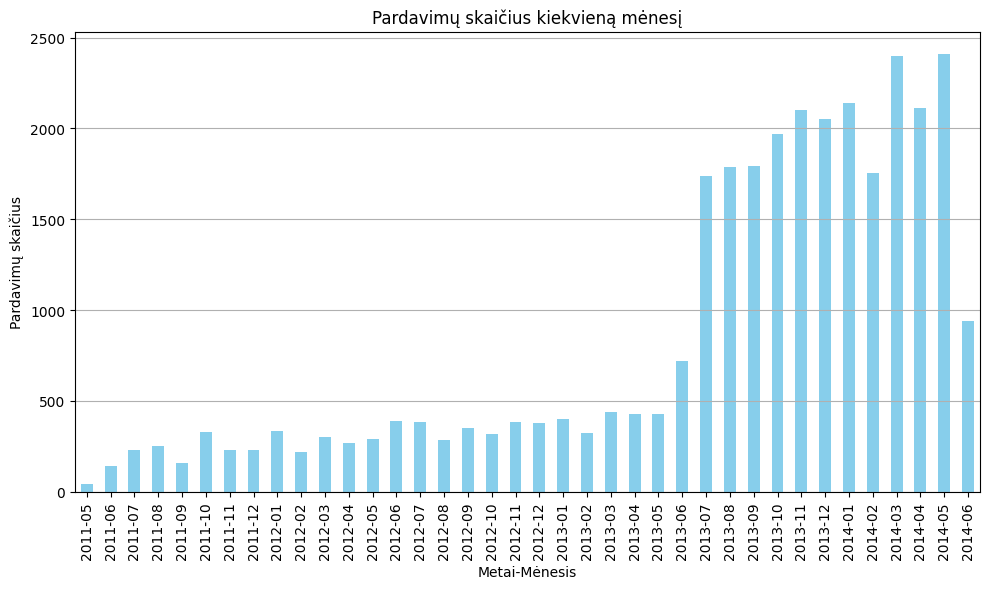

In [11]:
# print('Bendras kasmėnesinis pardavimų skaičius?')

import pandas as pd
import matplotlib.pyplot as plt

# Grupavimas pagal metus ir mėnesius
df['YearMonth'] = df['OrderDate'].dt.to_period('M')
monthly_sales = df.groupby('YearMonth').size()

# Braižome stulpelinę diagramą
monthly_sales.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Pardavimų skaičius kiekvieną mėnesį')
plt.xlabel('Metai-Mėnesis')
plt.ylabel('Pardavimų skaičius')
plt.xticks(rotation=90)
plt.grid(axis='y') # (axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


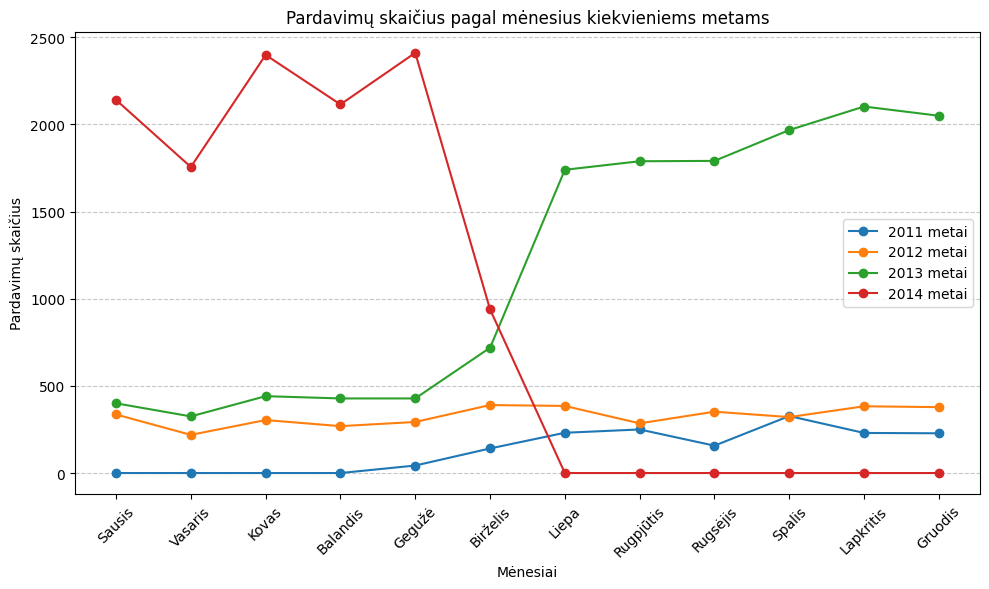

In [12]:
# Problema: nesant duomenų įrašomi nuliai:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pridedame metus ir mėnesius
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month

# Sukuriame pilną 12 mėnesių skalę
all_months = pd.DataFrame({'Month': np.arange(1, 13)})

# Grupavimas pagal metus ir mėnesius, užtikrinant trūkstamų mėnesių užpildymą
yearly_sales = (
    df.groupby(['Year', 'Month'])
    .size()
    .unstack(level=0, fill_value=0)
    .reindex(all_months['Month'], fill_value=0)
)

# Braižome grafikus
plt.figure(figsize=(10, 6))

for year in yearly_sales.columns:
    plt.plot(yearly_sales.index, yearly_sales[year], label=f'{year} metai', marker='o')

# Grafiko formatavimas
plt.title('Pardavimų skaičius pagal mėnesius kiekvieniems metams')
plt.xlabel('Mėnesiai')
plt.ylabel('Pardavimų skaičius')
plt.xticks(ticks=np.arange(1, 13), labels=['Sausis', 'Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis', 
                                           'Liepa', 'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

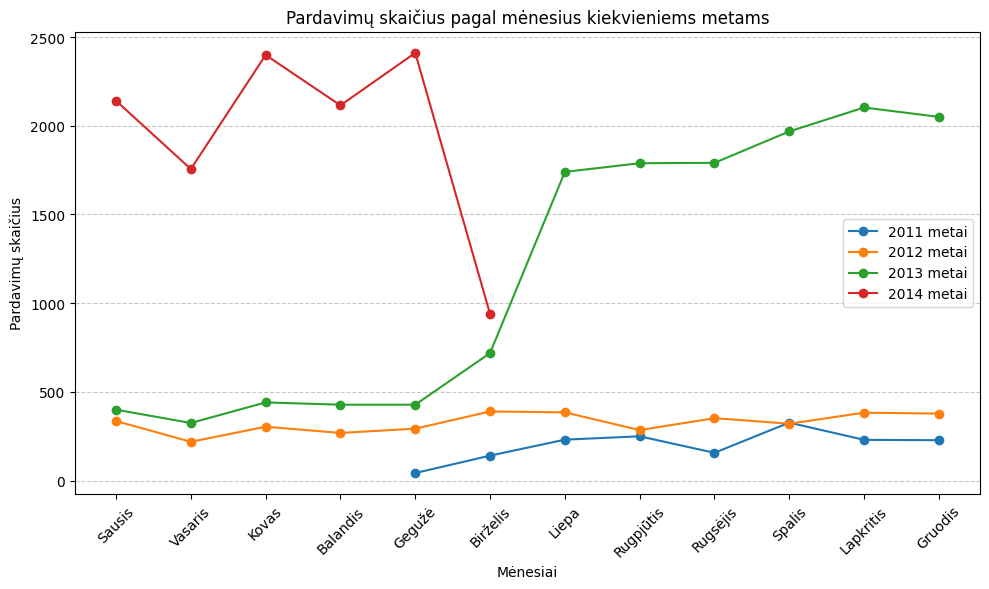

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Pridedame metus ir mėnesius
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month

# Grupavimas pagal metus ir mėnesius
yearly_sales = df.groupby(['Year', 'Month']).size().unstack(level=0, fill_value=0)

# Braižome grafikus
plt.figure(figsize=(10, 6))

for year in yearly_sales.columns:
    # Filtruojame tik tuos mėnesius, kuriuose yra pardavimų
    months_with_sales = yearly_sales[yearly_sales[year] > 0].index
    sales_values = yearly_sales.loc[months_with_sales, year]
    
    # Braižome tik tas reikšmes, kurios turi pardavimų
    plt.plot(months_with_sales, sales_values, label=f'{year} metai', marker='o')

# Grafiko formatavimas
plt.title('Pardavimų skaičius pagal mėnesius kiekvieniems metams')
plt.xlabel('Mėnesiai')
plt.ylabel('Pardavimų skaičius')
plt.xticks(ticks=range(1, 13), labels=['Sausis', 'Vasaris', 'Kovas', 'Balandis', 'Gegužė', 'Birželis', 
                                       'Liepa', 'Rugpjūtis', 'Rugsėjis', 'Spalis', 'Lapkritis', 'Gruodis'], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipykernel_7249/1378436910.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  all_months = pd.date_range(df['OrderDate'].min(), df['OrderDate'].max(), freq='M').to_period('M')


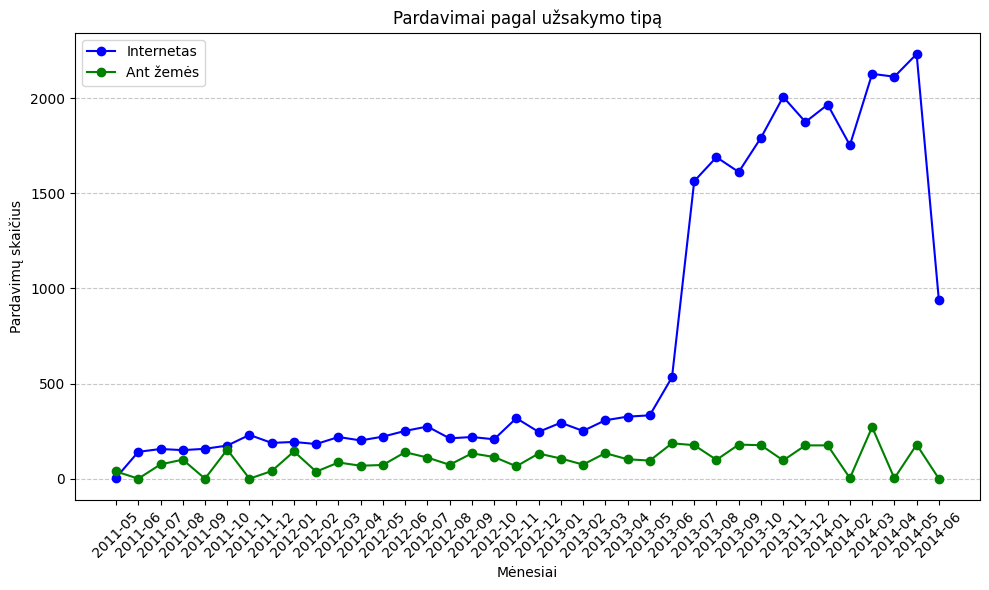

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pridedame metus ir mėnesius
df['YearMonth'] = df['OrderDate'].dt.to_period('M')

# Grupavimas pagal mėnesius ir OnlineOrderFlag
grouped = df.groupby(['YearMonth', 'OnlineOrderFlag']).size().unstack(level=1, fill_value=0)

# Sukuriame 12 mėnesių visam laikotarpiui
all_months = pd.date_range(df['OrderDate'].min(), df['OrderDate'].max(), freq='M').to_period('M')
grouped = grouped.reindex(all_months, fill_value=0)

# Braižome grafikus
plt.figure(figsize=(10, 6))

# "Internetas" kreivė
plt.plot(grouped.index.astype(str), grouped[1], label='Internetas', color='blue', marker='o')

# "Ant žemės" kreivė
plt.plot(grouped.index.astype(str), grouped[0], label='Ant žemės', color='green', marker='o')

# Grafiko formatavimas
plt.title('Pardavimai pagal užsakymo tipą')
plt.xlabel('Mėnesiai')
plt.ylabel('Pardavimų skaičius')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
# Tikriname, ar failas egzistuoja

import os
f_path = '../../../gautiDuomenys/AdventureWorks2022/AdventureWorks2022.db'
# f_path = '../../../AdwentureWorks2022.db'
if os.path.exists(f_path):
    print(f"Failas '{f_path}' egzistuoja.")
else:
    print(f"Failo '{f_path}' nerasta !!!")

Failas '../../../gautiDuomenys/AdventureWorks2022/AdventureWorks2022.db' egzistuoja.


In [ ]:
# AdwentureWorks2022

# -- Bendras kasmėnesinis pardavimų skaičius? (lentelė: SalesOrderHeader)

# select OrderDate, TerritoryID from `Sales/SalesOrderHeader`

# -- Mėnesiniai pardavimai pagal šalį (SalesOrderHeader, SalesTerritory, CountryRegion)

# SELECT SOH.OrderDate, SOH.TerritoryID, ST.Name, ST.CountryRegionCode, ST."Group" AS TerritoryGroup, CR.Name
# FROM "Sales/SalesOrderHeader" AS SOH
# JOIN "Sales/SalesTerritory" AS ST ON SOH.TerritoryID = ST.TerritoryID
# JOIN "Person/CountryRegion" AS CR ON ST.CountryRegionCode = CR.CountryRegionCode;

# -- Kurios parduotuvės pasirodo geriausiai? (SalesOrderHeader, Store)

SELECT SOH.OrderDate, SOH.TerritoryID, ST.Name AS AT_Name, ST.CountryRegionCode, ST."Group" AS ST_Group, 
CR.Name AS CR_Name, SOH.SalesPersonID, SOH.OnlineOrderFlag
FROM "Sales/SalesOrderHeader" AS SOH
JOIN "Sales/SalesTerritory" AS ST ON SOH.TerritoryID = ST.TerritoryID
JOIN "Person/CountryRegion" AS CR ON ST.CountryRegionCode = CR.CountryRegionCode
JOIN "Sales/Store" AS Store ON SOH.SalesPersonID = Store.SalesPersonID;

# -- Palyginkite Online versus Store pagal Sales count ir Revenue: 
# -- (SalesOrderHeader, , jei OnlineOrderFlag = 1, tai čia Online užsakymas.

SELECT 
    date(SOH.OrderDate) AS OrderDate, 
    CAST(SOH.SalesPersonID AS INTEGER) AS SalesPersonID, 
    SOH.OnlineOrderFlag, 
    ST.TerritoryID AS ST_TerritoryID, 
    ST.Name AS ST_Name, 
    ST.CountryRegionCode AS ST_CRC, 
    ST."Group" AS ST_Group, 
    CR.Name AS ST_Name, 
    SP.TerritoryID AS SP_TerritoryID
FROM "Sales/SalesOrderHeader" AS SOH
LEFT JOIN "Sales/SalesTerritory" AS ST ON SOH.TerritoryID = ST.TerritoryID
LEFT JOIN "Person/CountryRegion" AS CR ON ST.CountryRegionCode = CR.CountryRegionCode
LEFT JOIN "Sales/SalesPerson" AS SP ON SOH.SalesPersonID = SP.BusinessEntityID;

Result: 31465 rows returned in 38ms (EliteBook)

# -- atsakykite į klausimą, ar verta uždaryti/plėsti/nekeisti fizinių parduotuvių skaičiaus 
# -- eiti į Online, neiti į online?
# -- Pagrįskite.
 
# -- Koks vidutinis vieno užsakymo dydis kiekvienoje šalyje? 
# -- (SalesOrderHeader,SalesOrderDetail, SalesTerritory, CountryRegion)

SELECT 
    date(SOH.OrderDate) AS OrderDate, 
    CAST(SOH.SalesPersonID AS INTEGER) AS SalesPersonID, 
    SOH.OnlineOrderFlag, 
    ST.TerritoryID AS ST_TerritoryID, 
    ST.Name AS ST_Name, 
    ST.CountryRegionCode AS ST_CRC, 
    ST."Group" AS ST_Group, 
    CR.Name AS ST_Name, 
    SP.TerritoryID AS SP_TerritoryID
FROM "Sales/SalesOrderHeader" AS SOH
LEFT JOIN "Sales/SalesTerritory" AS ST ON SOH.TerritoryID = ST.TerritoryID
LEFT JOIN "Person/CountryRegion" AS CR ON ST.CountryRegionCode = CR.CountryRegionCode
LEFT JOIN "Sales/SalesPerson" AS SP ON SOH.SalesPersonID = SP.BusinessEntityID;


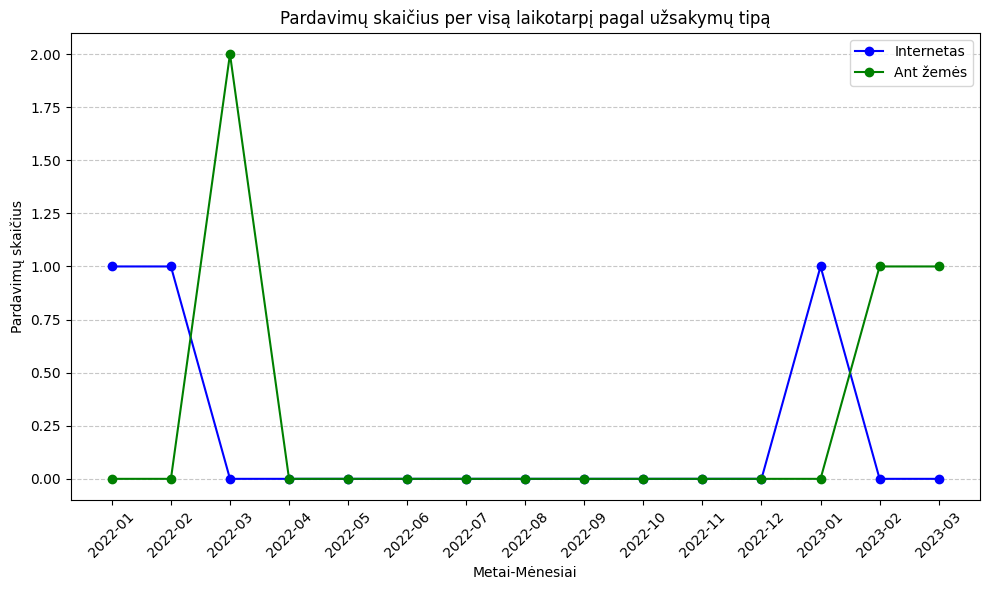

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Bandymas 'boolean'
data = {
    'OrderDate': ['2022-01-15', '2022-02-20', '2022-03-10', 
                  '2022-03-15', '2023-01-15', '2023-02-15', '2023-03-05'],
    'OnlineOrderFlag': [True, True, False, False, True, False, False]
}
df = pd.DataFrame(data)

# Konvertuojame OrderDate į datų formatą
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Pridedame metus ir mėnesius
df['YearMonth'] = df['OrderDate'].dt.to_period('M')

# Grupavimas pagal OnlineOrderFlag ir mėnesius
online_sales = df[df['OnlineOrderFlag']].groupby('YearMonth').size()
offline_sales = df[~df['OnlineOrderFlag']].groupby('YearMonth').size()

# Sukuriame pilną datų periodą, kad būtų tęstinumas
all_periods = pd.period_range(start=df['YearMonth'].min(), end=df['YearMonth'].max(), freq='M')
online_sales = online_sales.reindex(all_periods, fill_value=0)
offline_sales = offline_sales.reindex(all_periods, fill_value=0)

# Braižome grafikus
plt.figure(figsize=(10, 6))

plt.plot(online_sales.index.astype(str), online_sales.values, label='Internetas', marker='o', color='blue')
plt.plot(offline_sales.index.astype(str), offline_sales.values, label='Ant žemės', marker='o', color='green')

# Grafiko formatavimas
plt.title('Pardavimų skaičius per visą laikotarpį pagal užsakymų tipą')
plt.xlabel('Metai-Mėnesiai')
plt.ylabel('Pardavimų skaičius')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
